# Fundamentals and Applications of Machine Learning Project

# Introduction

For this project, I decided to move forward with the "Jupyter Notebook" tool, which I learned to use in my previous Machine Learning-related classes. I selected this strategy because it is simple to use and allows me to explain the procedures more in depth when developing my project.

## Import

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, make_scorer

First of all, before starting to analyze the models, I decided to take a look at the dataset that I will use during this project.

In [2]:
#Load the dataset and review.
original_dataset = pd.read_csv('dataset.csv',delimiter=',')
dataset = original_dataset.copy()

In [3]:
dataset

,SampleNo,x1,x2,x3,x4,x5,x6,Y
0,1,0,14,15,45,-13,15,2735.0
1,2,4,47,34,92,-12,34,6634.0
2,3,10,20,18,5,7,18,8756.0
3,4,0,23,25,16,-2,25,12762.0
4,5,6,38,5,60,-18,5,848.0
...,...,...,...,...,...,...,...,...
115,116,29,37,3,22,13,3,NaN
116,117,20,44,19,19,11,19,NaN
117,118,4,2,33,74,15,33,NaN
118,119,16,28,10,23,2,10,NaN


After viewing the dataset, I decided to analyze the relationship between predictors. To show these relationships as plots, I used the "pairplot" function that I have found from the seaborn library. This function uses each column as a parameter and displays them against one another.

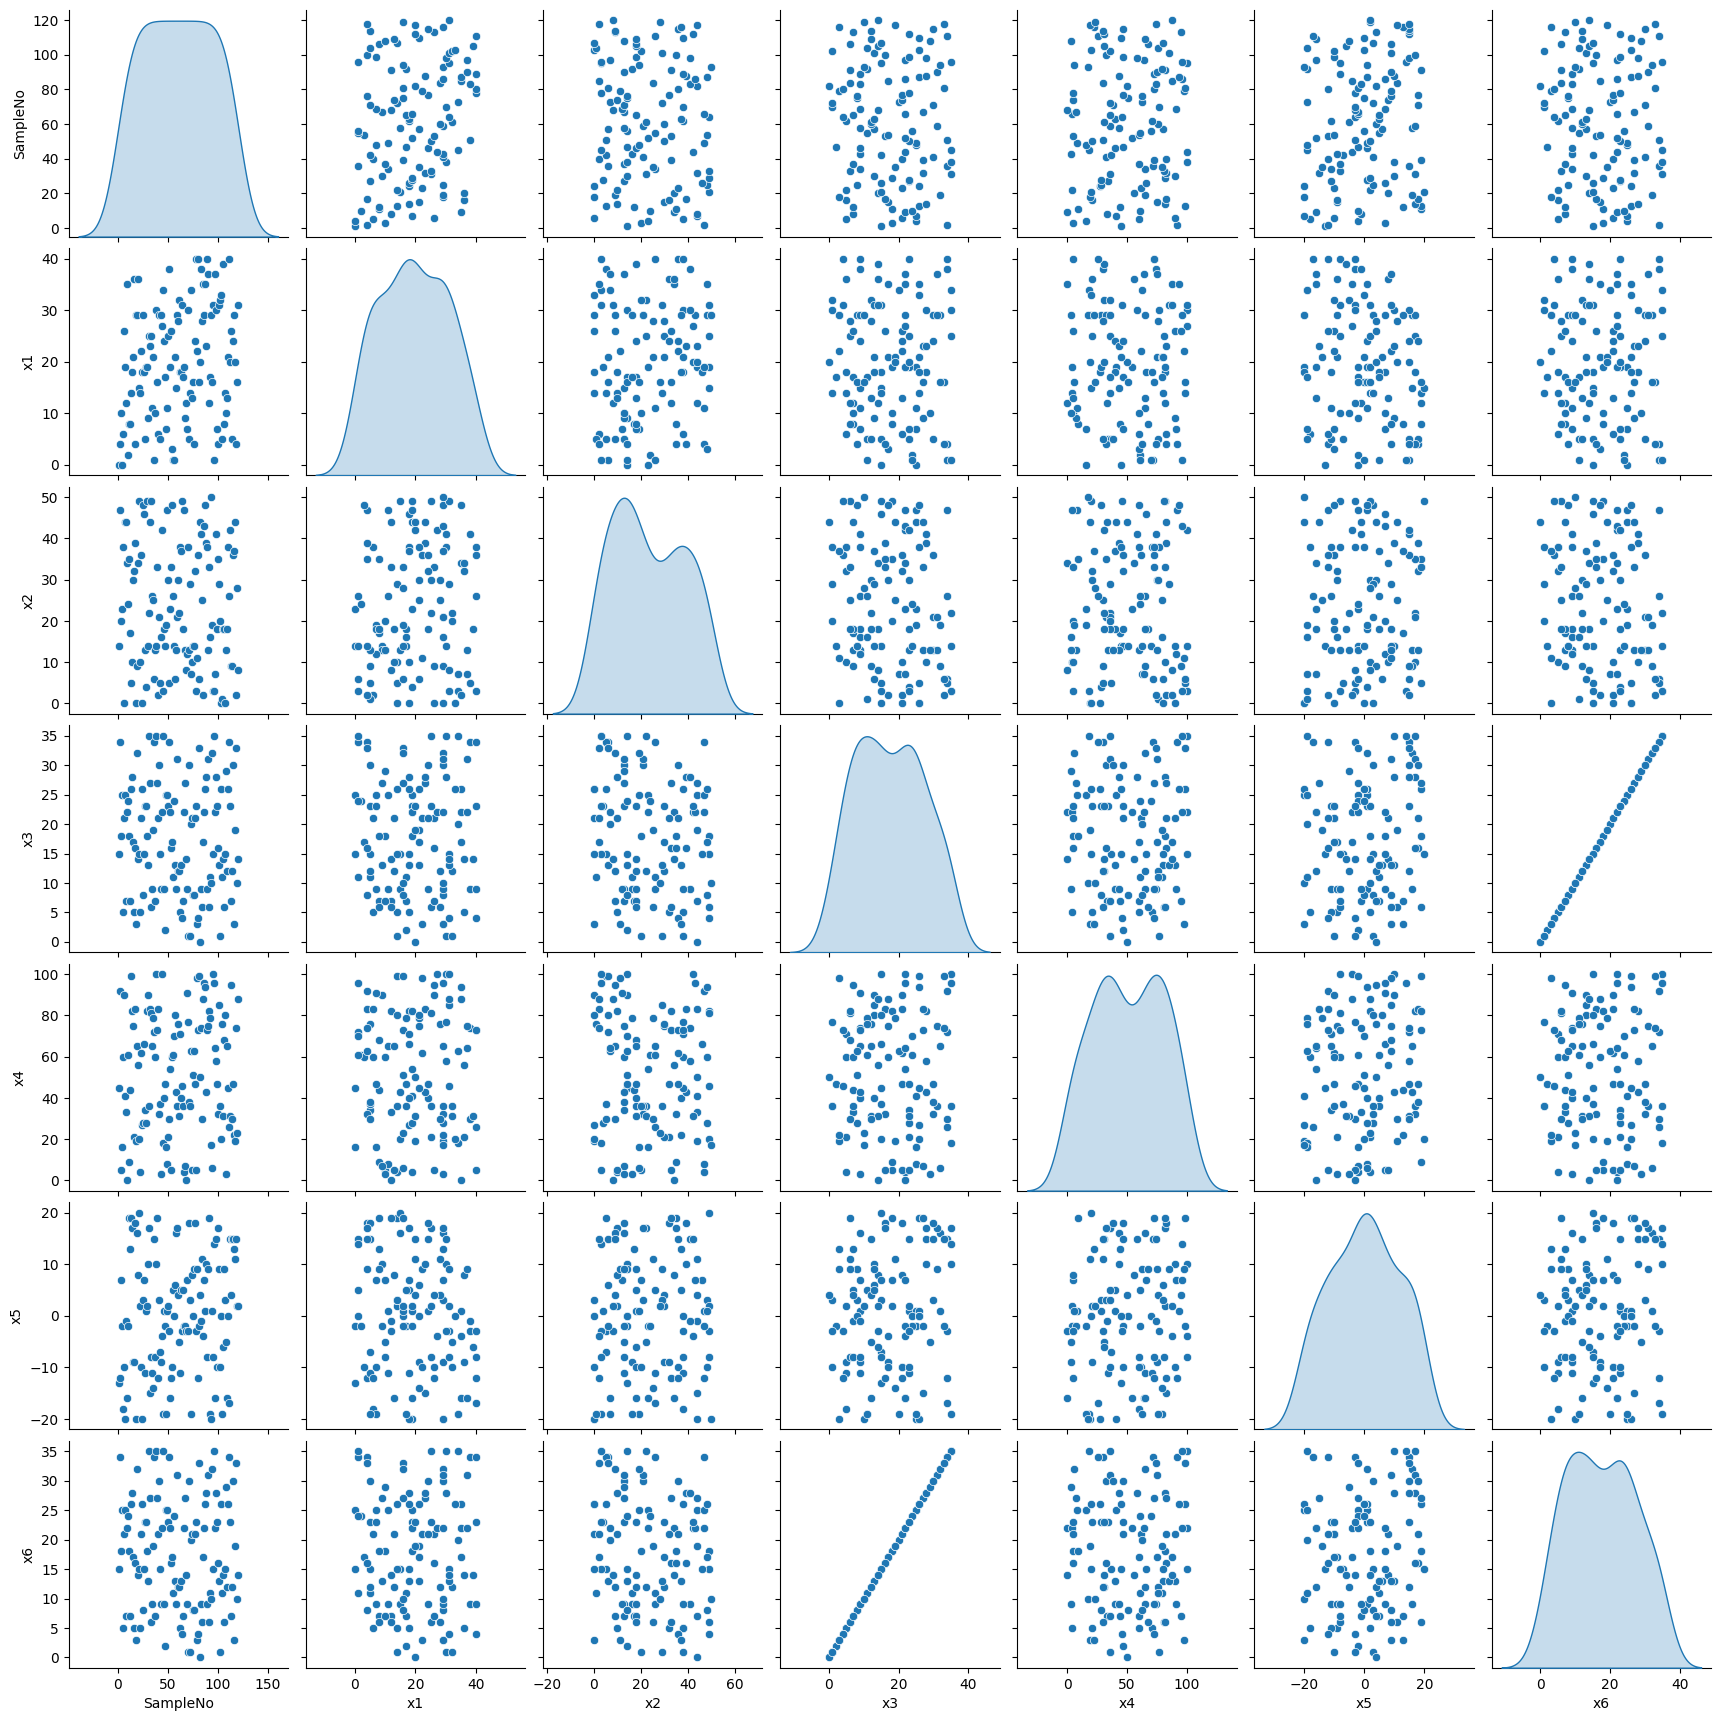

In [4]:
predictors = ['SampleNo', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6']
sns.pairplot(dataset[predictors], diag_kind='kde')

<Figure size 100x100 with 0 Axes>

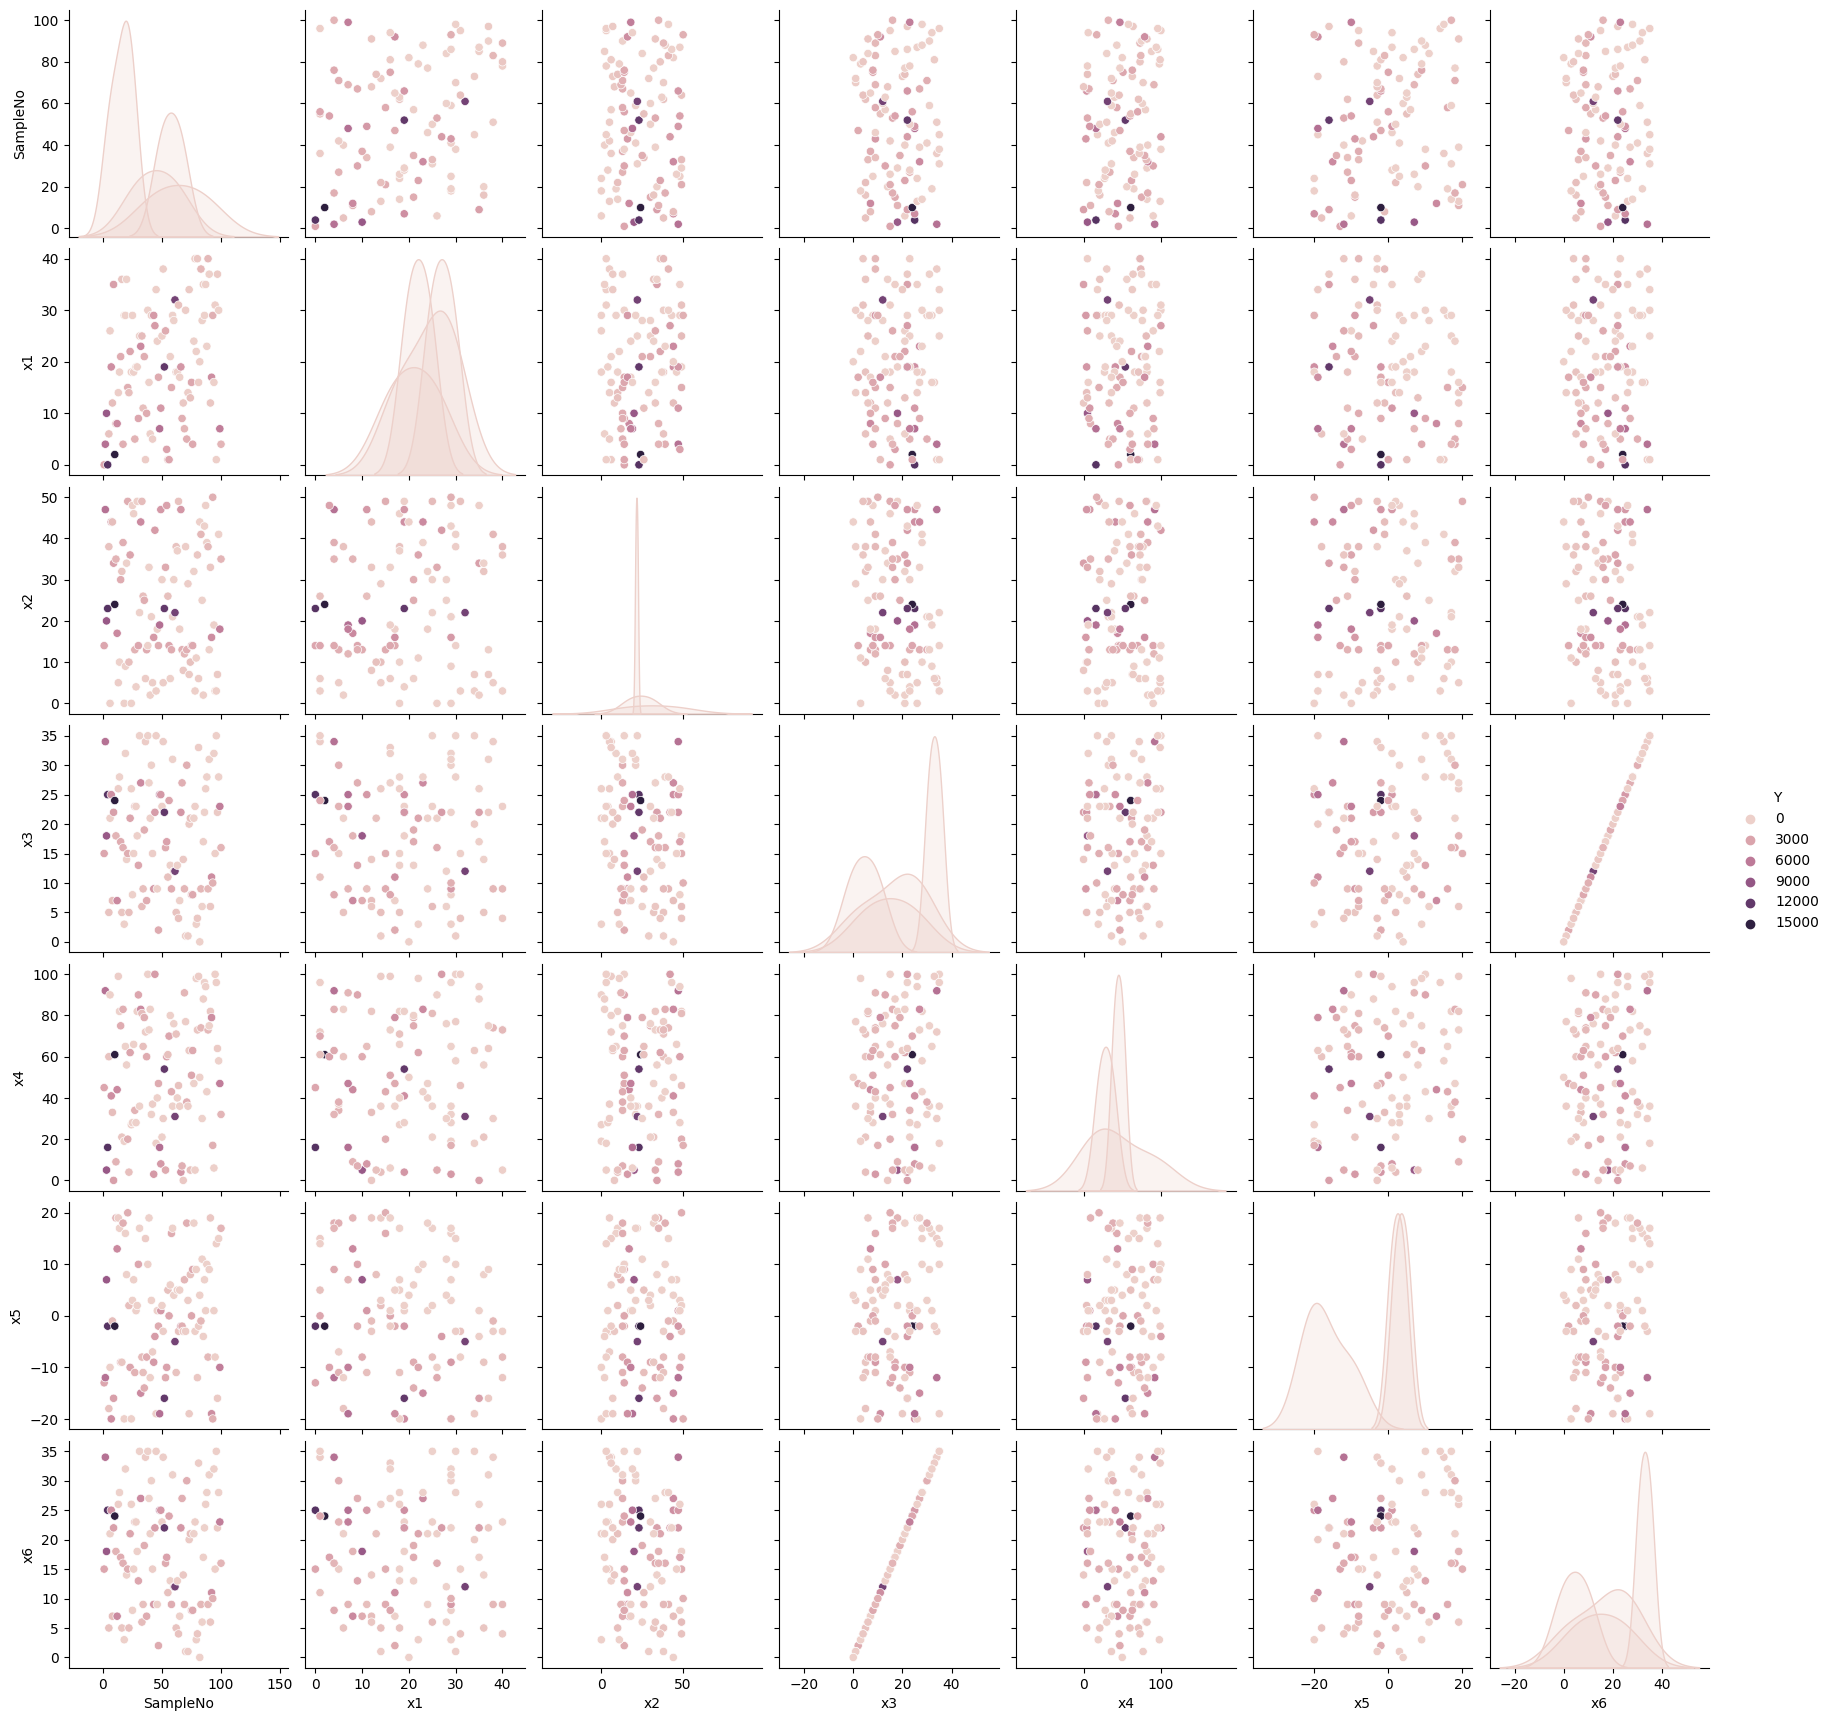

In [ ]:
#Here we can see the datas as a figures

plt.figure(figsize=(1,1))
ax = sns.pairplot(dataset, hue="Y")

After analysing the dataset we have, we can easily see that the values of "X3" and "X6" are the same. Because of this situation, it is best to drop one of them to simplify the dataset and analyse it easier.

In other words, it would be the best choice to get rid of the unnecessary parts such as "SampleNo" and "X6" in this case. That is why I decided to drop them from the predictors and the dataset.
 

In [ ]:
dataset = dataset.drop('SampleNo', axis=1)
predictors.remove('SampleNo')
dataset = dataset.drop('x6', axis=1)
predictors.remove('x6')
dataset

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      120 non-null    int64  
 1   x2      120 non-null    int64  
 2   x3      120 non-null    int64  
 3   x4      120 non-null    int64  
 4   x5      120 non-null    int64  
 5   Y       100 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 5.8 KB


In the dataset, we can see that there are "NaN" values under the Y. It would be great to see how many y values we are aiming to predict in this project.

In [8]:
pd.DataFrame(dataset.isna().sum()).T

,x1,x2,x3,x4,x5,Y
0,0,0,0,0,0,20


As we can see, there are 20 y values we need to find in this dataset. It would be best to drop them from the dataset we will analyze and store in another object.

In [9]:
y_predict= dataset.tail(20)
dataset = dataset.drop(y_predict.index)

In [10]:
y_predict

,x1,x2,x3,x4,x5,Y
100,31,29,13,85,9,NaN
101,32,20,1,36,-10,NaN
102,33,0,26,20,0,NaN
103,5,1,11,76,-19,NaN
104,39,18,14,31,-6,NaN
105,8,18,6,68,9,NaN
106,14,0,15,80,3,NaN
107,10,13,29,3,-5,NaN
108,13,18,12,65,-16,NaN
109,21,38,26,45,0,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    int64  
 1   x2      100 non-null    int64  
 2   x3      100 non-null    int64  
 3   x4      100 non-null    int64  
 4   x5      100 non-null    int64  
 5   Y       100 non-null    float64
dtypes: float64(1), int64(5)
memory usage: 4.8 KB


The version we can see above is the current version of the dataset that I will be working on to predict the missing y values in this project.

# Implementation

In this project, I decided to use a few models to examine the data properly. The models I used are listed below: 

1. Simple Linear Regression
2. Multiple Linear Regression


### Simple Linear Regression

In this project, my first model is Simple Linear Regression. 
In this project, my first model is Simple Linear Regression. 
To put it simply, Linear Regression asserts that Y is dependent on X1, X2,...Xp. Because of its simplicity, I chose to do it first. We learnt how to develop this model during our lab sessions, thus I decided to use it even though I knew that the results would be worse when we compare it to the other models.

In [12]:
#This also will be used in other models
scorer = make_scorer(mean_squared_error)

In [13]:
def simple_linear_regression(x, y, selected_predictors=None, cv=None, scorer=scorer):
    if selected_predictors is None:
        selected_predictors = predictors
    cv_score = cross_val_score(estimator=LinearRegression(), X=x[selected_predictors], y=y, cv=cv, scoring=scorer)
    cv_prediction = cross_val_predict(estimator=LinearRegression(), X=x[selected_predictors], y=y, cv=cv)

    model = LinearRegression()
    model.fit(x, y)
    y_predicted = model.predict(y_predict[selected_predictors])
    return y_predicted, cv_prediction, cv_score

After defining the function for simple linear regression, I decided to visualise the relationship between each predictor and Y.

<Axes: xlabel='x5', ylabel='Y'>

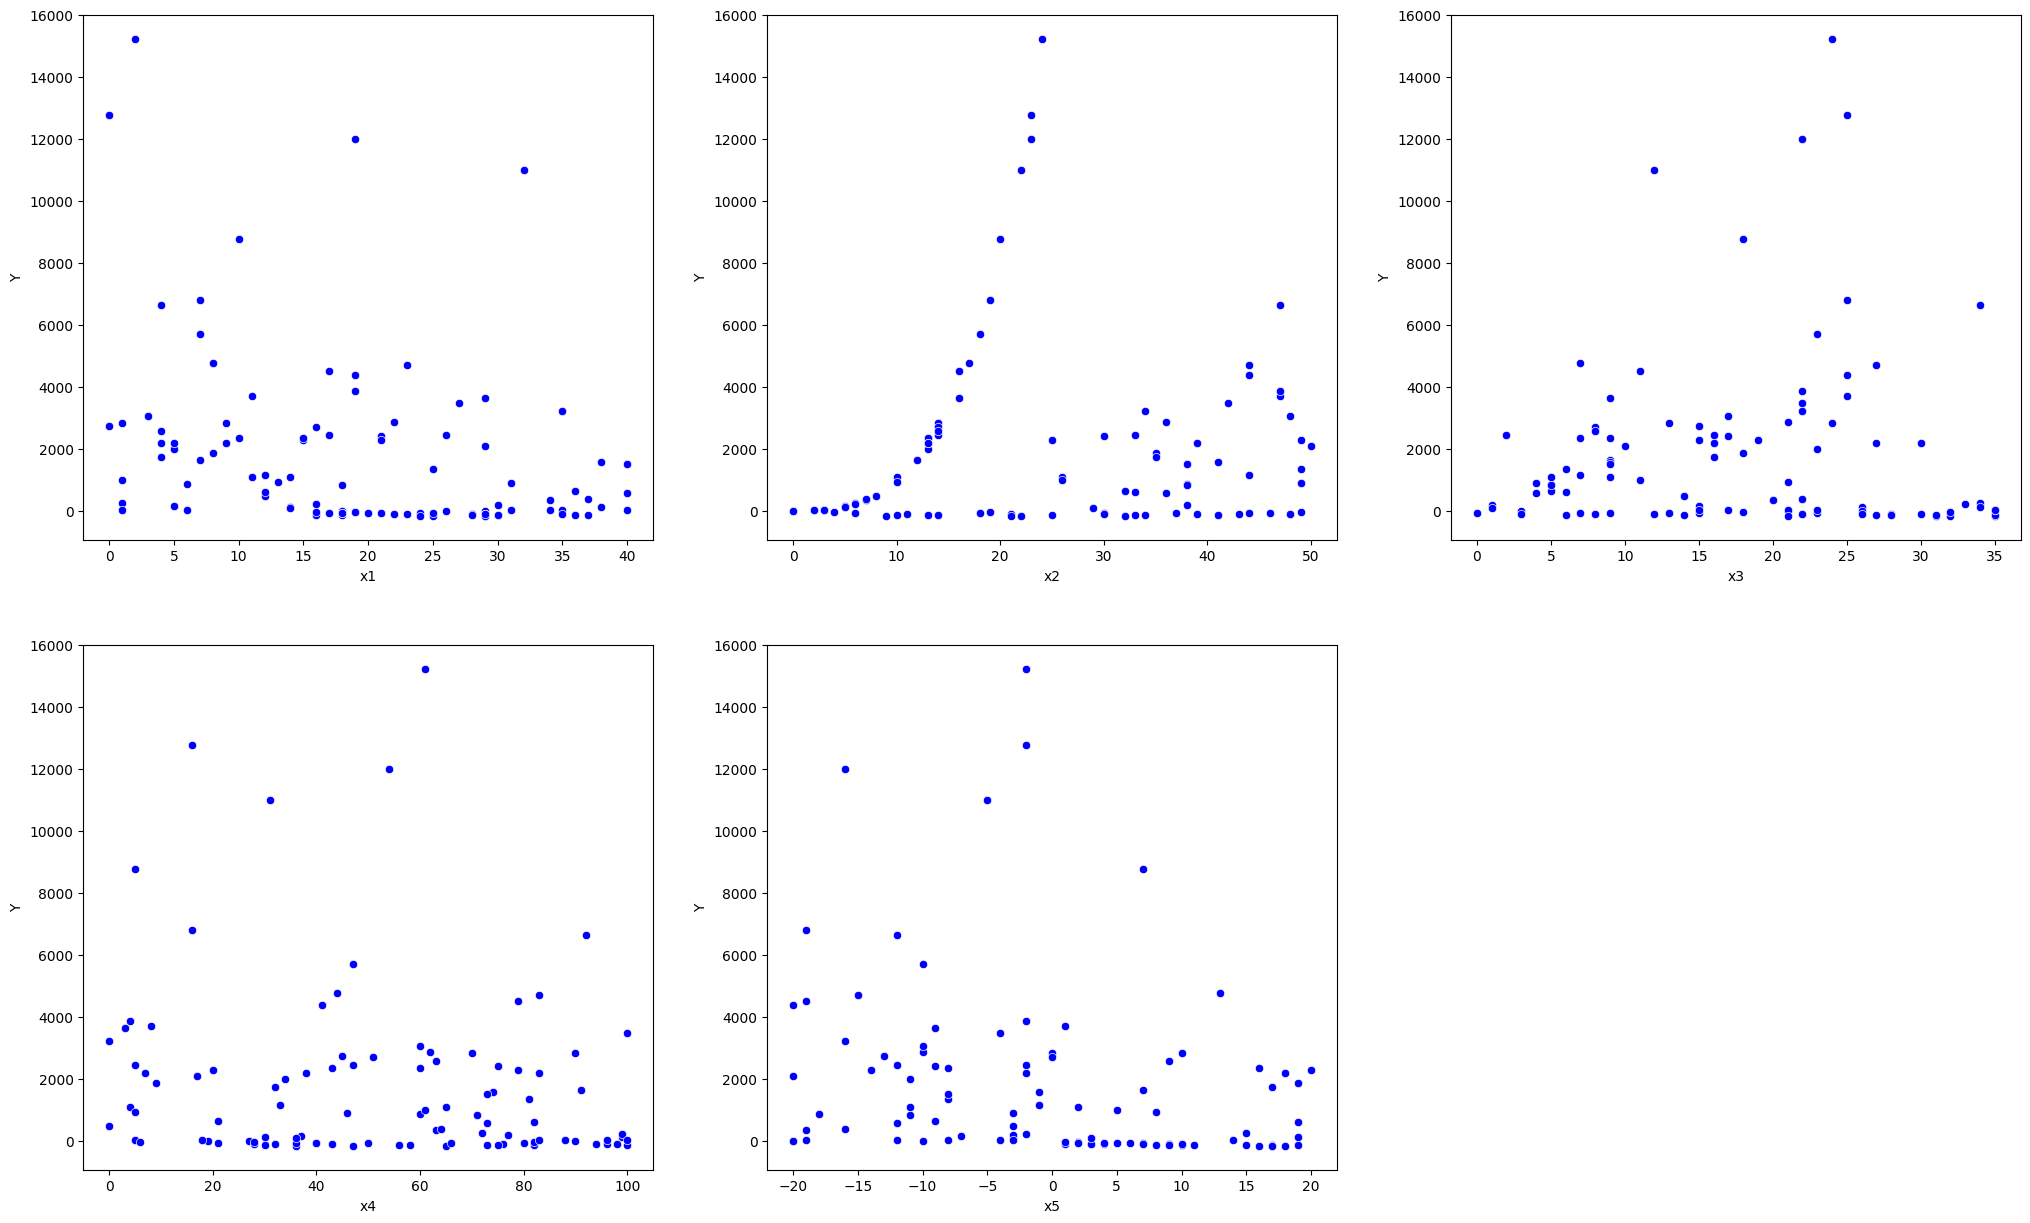

In [14]:
# plot the graphs
#X1
plt.figure(figsize=(25, 15))
plt.subplot(2, 3, 1)
sns.scatterplot(x=dataset['x1'], y=dataset['Y'], color='b')
#X2
plt.subplot(2, 3, 2)
sns.scatterplot(x=dataset['x2'], y=dataset['Y'], color='b')
#X3
plt.subplot(2, 3, 3)
sns.scatterplot(x=dataset['x3'], y=dataset['Y'], color='b')
#X4
plt.subplot(2, 3, 4)
sns.scatterplot(x=dataset['x4'], y=dataset['Y'], color='b')
#X5
plt.subplot(2, 3, 5)
sns.scatterplot(x=dataset['x5'], y=dataset['Y'], color='b')

### Multiple Linear Regression

I believe using Multiple Linear Regression is an excellent technique to begin analysing the dataset. 